In [68]:
#importacao de bibliotecas

#bibliotecas para trabalhar com dados e graficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

#bibliotecas do scikit-learn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#biblioteca para exportacoes e importacoes de arquivos
from joblib import dump, load

#biblioteca para implementar uma barra de progresso
import progressbar

#biblioteca para tocar sons
import pygame

#bibliotecas para deep learning
import tensorflow.keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, LayerNormalization, BatchNormalization, Flatten, Dense, Reshape, Dropout

from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import BinaryCrossentropy

#bibliotecas para plotar graficos do keras
import pydot as pyd
import pydotplus
from pydotplus import graphviz
from tensorflow.keras.utils import plot_model, model_to_dot
tensorflow.keras.utils.pydot = pyd


In [69]:
#Realizar interpolacao de dados
interp_exec = True

#realizar deteccao e substituicao de outliers
outliers_exec = True

#realizar normalizacao de dados
normalization_exec = True

#realizar escalonamento de dados
scale_exec = True

#exportar os datasets tratados
export_frames = True

#gerar um novo modelo ou usar um pronto
new_model = True

In [70]:
#importando o datase
data = pd.read_csv('pokerhand_dataset.csv')

#separando os dados de entrada e saida
x = data.iloc[:,0:10]

y = data.iloc[:,10]

#convertendo as entradas para binario (jeito raiz)
data_binary = []
for i in range(15000):
    aux_yhat = ""
    for j in range(len(x.columns)):
            if j % 2 == 0:
                if x.iloc[i,j] == 1:
                    repr = "00"
                elif x.iloc[i,j] == 2:
                    repr = "01"
                elif x.iloc[i,j] == 3:
                    repr = "10"
                elif x.iloc[i,j] == 4:
                    repr = "11"
            else:
                if x.iloc[i,j] == 1:
                    number = "0000"
                elif x.iloc[i,j] == 2:
                    number = "0001"
                elif x.iloc[i,j] == 3:
                    number = "0010"
                elif x.iloc[i,j] == 4:
                    number = "0011"
                elif x.iloc[i,j] == 5:
                    number = "0100"
                elif x.iloc[i,j] == 6:
                    number = "0101"
                elif x.iloc[i,j] == 7:
                    number = "0110"
                elif x.iloc[i,j] == 8:
                    number = "0111"
                elif x.iloc[i,j] == 9:
                    number = "1000"
                elif x.iloc[i,j] == 10:
                    number = "1001"
                elif x.iloc[i,j] == 11:
                    number = "1010"
                elif x.iloc[i,j] == 12:
                    number = "1011"
                elif x.iloc[i,j] == 13:
                    number = "1100"
                repr += number
                aux_yhat += repr
    data_binary.append(aux_yhat)

#convertendo as saidas para binario
y_binary = []
for j in range(15000):
    if y[j] == 0:
        repr = "0000"
    elif y[j] == 1:
        repr = "0001"
    elif y[j] == 2:
        repr = "0010"
    elif y[j] == 3:
        repr = "0011"
    elif y[j] == 4:
        repr = "0100"
    elif y[j] == 5:
        repr = "0101"
    elif y[j] == 6:
        repr = "0110"
    elif y[j] == 7:
        repr = "0111"
    elif y[j] == 8:
        repr = "1000"
    elif y[j] == 9:
        repr = "1001"
    y_binary.append(repr) 

#transformando os dados em listas de inteiros
for i in range(len(data_binary)):
    data_binary[i] = list(data_binary[i])
    for j in range(len(data_binary[i])):
        data_binary[i][j] = int(data_binary[i][j])

#transformando os dados em listas de inteiros
for i in range(len(y_binary)):
    y_binary[i] = list(y_binary[i])
    for j in range(len(y_binary[i])):
        y_binary[i][j] = int(y_binary[i][j])

    

In [71]:
#separando os dados de treino e teste
x_train = data_binary[:int(len(data_binary)*0.8)]
x_test = data_binary[int(len(data_binary)*0.8):]

#convert data to numpy matrix
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = y_binary[:int(len(y_binary)*0.8)]
y_test = y_binary[int(len(y_binary)*0.8):]

#convert data to numpy matrix
y_train = np.array(y_train)
y_test = np.array(y_test)

print (y_train.shape[1])


4


In [72]:
act_function = 'sigmoid'
drop = 0.1
initializer = tensorflow.keras.initializers.LecunNormal()

inputs = Input(shape = (x_train.shape[1]), dtype='int8')

layer1 = Dense(8, activation=act_function, kernel_initializer=initializer)(inputs)
layer1 = Dropout(drop)(layer1)
#layer1 = BatchNormalization()(layer1)

layer2 = Dense(16, activation=act_function, kernel_initializer=initializer)(layer1)
layer2 = Dropout(drop)(layer2)
#layer2 = BatchNormalization()(layer2)

layer3 = Dense(8, activation=act_function, kernel_initializer=initializer)(layer2)
layer3 = Dropout(drop)(layer3)
#layer3 = BatchNormalization()(layer3)

outputs = Dense(y_train.shape[1], activation=act_function, kernel_initializer=initializer)(layer3)

dnn_poker = Model(inputs, outputs)

dnn_poker.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_16 (Dense)            (None, 8)                 248       
                                                                 
 dropout_12 (Dropout)        (None, 8)                 0         
                                                                 
 dense_17 (Dense)            (None, 16)                144       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dropout_14 (Dropout)        (None, 8)                 0   

c:\Users\luiza\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer LecunNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [73]:
if (new_model == True):
    
    tensorflow.keras.backend.set_epsilon(1)
    opt = Adam(learning_rate=0.0001)
    
    dnn_poker.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    cp = ModelCheckpoint(
    filepath='models/',
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True)
    
    es = EarlyStopping(monitor='loss', mode='min', patience=100)

    history = dnn_poker.fit(x_train, y_train, 
                                validation_split= 0.2 ,
                                epochs=200, 
                                verbose=1, 
                                callbacks=[es], 
                                batch_size=16, 
                                shuffle=False)
    
    np.save('models/history_model.npy', history.history)
    #dnn_poker.load_weights('models/')
    dnn_poker.save('models/dnn_poker.h5')
else:
    dnn_poker = load_model('/models/dnn_poker.h5')

Epoch 1/200
600/600 [==============================] - 5s 5ms/step - loss: 0.6446 - accuracy: 0.0706 - val_loss: 0.5720 - val_accuracy: 0.0088
Epoch 2/200
600/600 [==============================] - 3s 4ms/step - loss: 0.5187 - accuracy: 0.2579 - val_loss: 0.4595 - val_accuracy: 0.4092
Epoch 3/200
600/600 [==============================] - 2s 4ms/step - loss: 0.4241 - accuracy: 0.4263 - val_loss: 0.3828 - val_accuracy: 0.4092
Epoch 4/200
600/600 [==============================] - 2s 4ms/step - loss: 0.3645 - accuracy: 0.4299 - val_loss: 0.3360 - val_accuracy: 0.4092
Epoch 5/200
600/600 [==============================] - 3s 4ms/step - loss: 0.3274 - accuracy: 0.4298 - val_loss: 0.3076 - val_accuracy: 0.4092
Epoch 6/200
600/600 [==============================] - 2s 4ms/step - loss: 0.3052 - accuracy: 0.4295 - val_loss: 0.2897 - val_accuracy: 0.4092
Epoch 7/200
600/600 [==============================] - 2s 4ms/step - loss: 0.2893 - accuracy: 0.4296 - val_loss: 0.2780 - val_accuracy: 0.4092

{'loss': [0.6445574760437012, 0.5187397599220276, 0.4240804612636566, 0.36446046829223633, 0.3274488151073456, 0.30515870451927185, 0.2892981171607971, 0.27973005175590515, 0.27241843938827515, 0.2670929729938507, 0.26354387402534485, 0.2610975503921509, 0.2581583261489868, 0.25701358914375305, 0.25547972321510315, 0.2550511658191681, 0.254777729511261, 0.2543073892593384, 0.2545008659362793, 0.253481388092041, 0.25330424308776855, 0.25293686985969543, 0.2535533010959625, 0.2524331510066986, 0.25302281975746155, 0.2527809739112854, 0.25303784012794495, 0.2528208792209625, 0.2526506185531616, 0.2524120807647705, 0.2522343099117279, 0.2523331344127655, 0.25255852937698364, 0.25213274359703064, 0.252014696598053, 0.25238263607025146, 0.25254538655281067, 0.2523152828216553, 0.25168755650520325, 0.25166159868240356, 0.2517523765563965, 0.2520461678504944, 0.2518415153026581, 0.2517285645008087, 0.2515561878681183, 0.25157466530799866, 0.2518948018550873, 0.25200241804122925, 0.252268016338

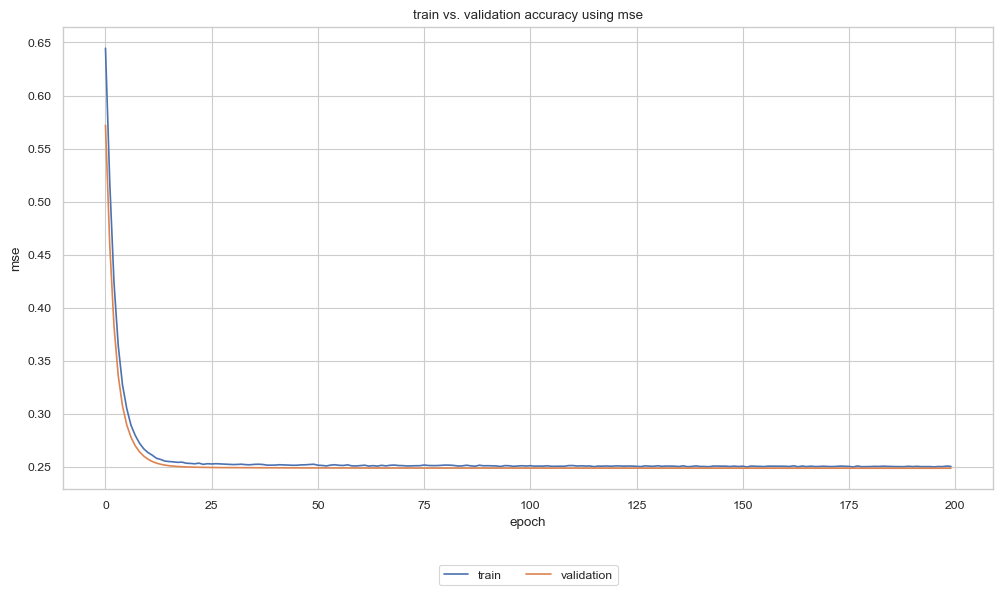

In [74]:
history=np.load('models/history_model.npy', allow_pickle='TRUE').item()

sns.set(rc={'figure.figsize':(12, 6)})
sns.set_style('whitegrid')
sns.set_context('paper')

print (history)

train_metric = history['loss']
valid_metric = history['val_loss']
name_metric = 'mse'

fig = plt.figure()

plt.plot(train_metric, label='train'),
plt.plot(valid_metric, label='validation')
plt.ylabel(name_metric)
plt.xlabel('epoch')
plt.title(f'train vs. validation accuracy using {name_metric}')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)

plt.show()

In [75]:
y_hat = dnn_poker.predict(x_test)

y_hat, y_test = (y_hat > 0.5, y_test > 0.5)

94/94 [==============================] - 0s 2ms/step


In [89]:
#convert binary to int 
y_hat_int = y_hat.astype(int)

y_test_int = y_test.astype(int)

aux_yhat =[]
for i in range(len(y_hat_int)):
    if (y_hat_int[i] == [0,0,0,0]).all():
        aux_yhat.append(0)
    elif (y_hat_int[i] == [0,0,0,1]).all():
        aux_yhat.append(1)
    elif (y_hat_int[i] == [0,0,1,0]).all():
        aux_yhat.append(2)
    elif (y_hat_int[i] == [0,0,1,1]).all():
        aux_yhat.append(3)
    elif (y_hat_int[i] == [0,1,0,0]).all():
        aux_yhat.append(4)
    elif (y_hat_int[i] == [0,1,0,1]).all():
        aux_yhat.append(5)
    elif (y_hat_int[i] == [0,1,1,0]).all():
        aux_yhat.append(6)
    elif (y_hat_int[i] == [0,1,1,1]).all():
        aux_yhat.append(7)
    elif (y_hat_int[i] == [1,0,0,0]).all():
        aux_yhat.append(8)
    elif (y_hat_int[i] == [1,0,0,1]).all():
        aux_yhat.append(9)

aux_ytest =[]
for i in range(len(y_test_int)):
    if (y_test_int[i] == [0,0,0,0]).all():
        aux_ytest.append(0)
    elif (y_test_int[i] == [0,0,0,1]).all():
        aux_ytest.append(1)
    elif (y_test_int[i] == [0,0,1,0]).all():
        aux_ytest.append(2)
    elif (y_test_int[i] == [0,0,1,1]).all():
        aux_ytest.append(3)
    elif (y_test_int[i] == [0,1,0,0]).all():
        aux_ytest.append(4)
    elif (y_test_int[i] == [0,1,0,1]).all():
        aux_ytest.append(5)
    elif (y_test_int[i] == [0,1,1,0]).all():
        aux_ytest.append(6)
    elif (y_test_int[i] == [0,1,1,1]).all():
        aux_ytest.append(7)
    elif (y_test_int[i] == [1,0,0,0]).all():
        aux_ytest.append(8)
    elif (y_test_int[i] == [1,0,0,1]).all():
        aux_ytest.append(9)

aux_yhat = np.array(aux_yhat)
aux_ytest = np.array(aux_ytest)


In [77]:
#calculando a matriz de confusao
cm = confusion_matrix(aux_ytest, aux_yhat)

#calculando a taxa de acerto
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
accuracy_percent = round(accuracy * 100, 2)
print("Taxa de Acerto: {:.2f}%".format(accuracy_percent))

Taxa de Acerto: 51.43%


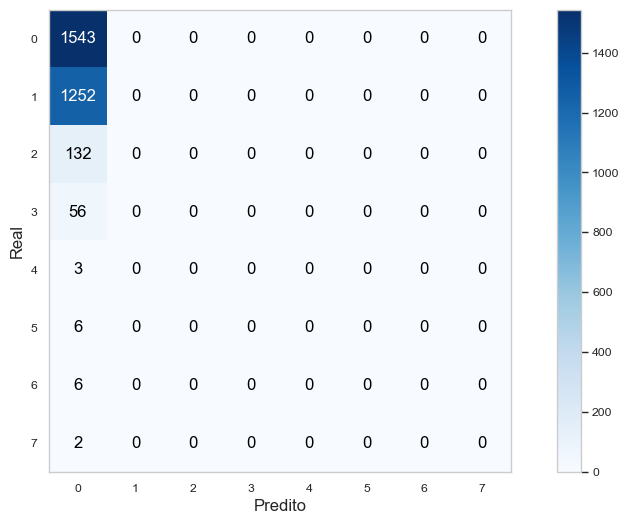

In [78]:
plt.grid(False)
plt.imshow(cm, cmap='Blues')

plt.xlabel('Predito', fontsize=12)
plt.ylabel('Real', fontsize=12)

threshold = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'white' if cm[i, j] > threshold else 'black'
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color=color, fontsize=12)

plt.colorbar()
plt.show()